# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
import json
import requests


# Importing random library for randomizing longitudes
import random

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")


City Name: chuy, City ID: 3443061
City Name: hermanus, City ID: 3366880
City Name: ushuaia, City ID: 3833367
City Name: vestmannaeyjar, City ID: 3412093
City Name: butaritari, City ID: 2110227
City Name: hithadhoo, City ID: 1282256
City Name: kuryk, City ID: 609919
City Name: jamestown, City ID: 5122534
That record does not exist, searching for next record...
City Name: upernavik, City ID: 3418910
City Name: haines junction, City ID: 5969025
City Name: leningradskiy, City ID: 2123814
That record does not exist, searching for next record...
City Name: kiunga, City ID: 2093846
City Name: bluff, City ID: 2206939
City Name: poum, City ID: 2138555
City Name: vostok, City ID: 2013279
City Name: tuktoyaktuk, City ID: 6170031
City Name: padang, City ID: 1633419
City Name: eureka, City ID: 5563397
City Name: avarua, City ID: 4035715
City Name: castro, City ID: 3466704
City Name: bredasdorp, City ID: 1015776
City Name: atambua, City ID: 1651103
City Name: bengkulu, City ID: 1649150
City Name: mo

City Name: fort nelson, City ID: 5955902
City Name: dunmore town, City ID: 3572462
City Name: half moon bay, City ID: 5354943
City Name: asfi, City ID: 2537881
City Name: sayyan, City ID: 70979
City Name: mar del plata, City ID: 3430863
City Name: san policarpo, City ID: 1688696
City Name: puerto ayacucho, City ID: 3629710
City Name: chirongui, City ID: 1090415
City Name: meulaboh, City ID: 1214488
City Name: victoria, City ID: 1819729
City Name: bridlington, City ID: 2654728
City Name: saskylakh, City ID: 2017155
City Name: arman, City ID: 2127060
That record does not exist, searching for next record...
City Name: saint-joseph, City ID: 6690296
City Name: mackay, City ID: 2159220
City Name: broken hill, City ID: 2173911
City Name: kavaratti, City ID: 1267390
City Name: nadvoitsy, City ID: 523662
City Name: klaksvik, City ID: 2618795
City Name: narsaq, City ID: 3421719
City Name: cabo san lucas, City ID: 3985710
City Name: loikaw, City ID: 1313479
City Name: tabou, City ID: 2281120
Cit

City Name: talnakh, City ID: 1490256
City Name: isangel, City ID: 2136825
That record does not exist, searching for next record...
City Name: kindu, City ID: 212902
City Name: jamame, City ID: 56399
City Name: pemberton, City ID: 6100799
City Name: odweyne, City ID: 53372
City Name: skibbereen, City ID: 2961459
City Name: kirovskiy, City ID: 2022064
City Name: narrabri, City ID: 2155742
City Name: sulangan, City ID: 1685422
City Name: adrar, City ID: 2381972
City Name: mayya, City ID: 2020121
City Name: kasongo-lunda, City ID: 2315026
City Name: picota, City ID: 3693646
City Name: grand-lahou, City ID: 2288105
City Name: seaham, City ID: 2638302
City Name: ponta delgada, City ID: 3372783
City Name: ewo, City ID: 2260009
City Name: sabzevar, City ID: 118063
City Name: luwuk, City ID: 1637001
City Name: chimore, City ID: 3920736
City Name: baykit, City ID: 1510689
City Name: birao, City ID: 240210
City Name: bogotol, City ID: 1509852
City Name: kitimat, City ID: 5993072
City Name: arai, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,3443061,Chui,UY,-33.6971,-53.4616,58.64,94,86,14.90
1,3366880,Hermanus,ZA,-34.4187,19.2345,52.02,66,9,5.86
2,3833367,Ushuaia,AR,-54.8000,-68.3000,42.46,87,90,9.22
3,3412093,Vestmannaeyjar,IS,63.4427,-20.2734,49.12,73,100,13.98
4,2110227,Butaritari,KI,3.0707,172.7902,82.98,71,86,15.03


In [45]:
# Export to .csv file
cities_df.to_csv("../Output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

#### This graph looks at the relationship between latitude and temperature. As one approaches the equator, the temperature increases.

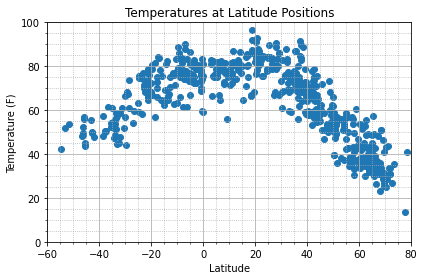

In [46]:
fig = plt.figure()
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/lat_temp1.png")
fig.savefig('lat_temp2.png', dpi=100)

## Latitude vs. Humidity Plot

#### This graph looks at the relationship between latitude and humidity. It shows lower humidity in the higher and lower latitudes.

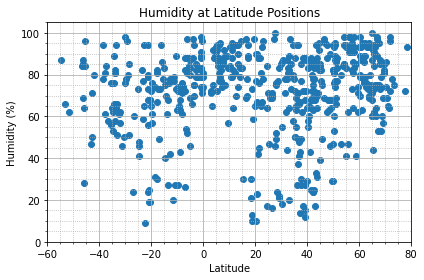

In [47]:
fig = plt.figure()
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/lat_humid1.png")
fig.savefig('lat_humid2.png', dpi=100)

## Latitude vs. Cloudiness Plot

#### This graph looks at the relationship between latitude and cloudiness. It shows insignificant correlation between latitude and cloudiness.

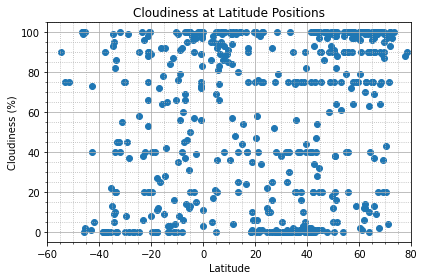

In [48]:
fig = plt.figure()
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/lat_clouds1.png")
fig.savefig('lat_clouds2', dpi=100)

## Latitude vs. Wind Speed Plot

#### This graph looks at the relationship between latitude and wind speed. It indicates that wind speeds are generally greater the farther away from the equator.

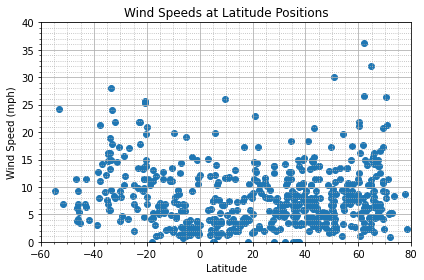

In [49]:
fig = plt.figure()
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/lat_wind1.png")
fig.savefig('lat_wind2.png', dpi=100)

## Linear Regression

In [12]:
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

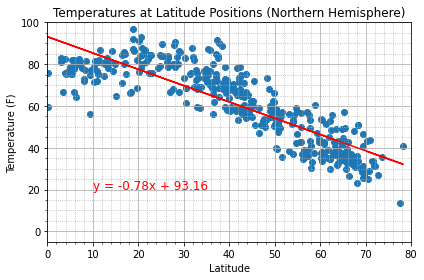

In [50]:
fig = plt.figure()
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/nh_lat_temp_regression1.png")
fig.savefig('nh_lat_temp_regression2.png', dpi=100)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

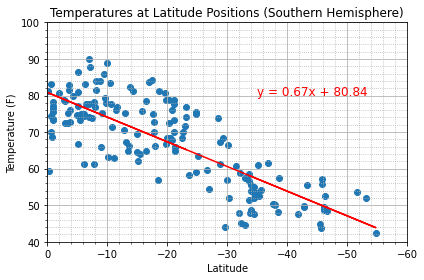

In [51]:
fig = plt.figure()
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/sh_lat_temp_regression1.png")
fig.savefig('sh_lat_temp_regression2.png', dpi=100)

## Max Temp vs Latitude Linear Regression

#### Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature. Closer to the equator, the higher the temperature. There is a strong correlation for both hemispheres.¶

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

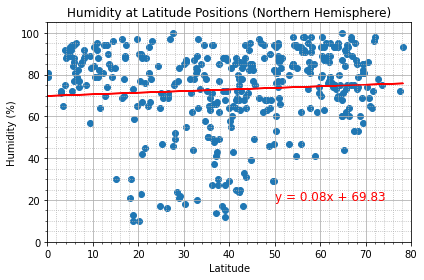

In [52]:
fig = plt.figure()
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/nh_lat_humid_regression1.png")
fig.savefig('nh_lat_humid_regression2.png', dpi=100)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

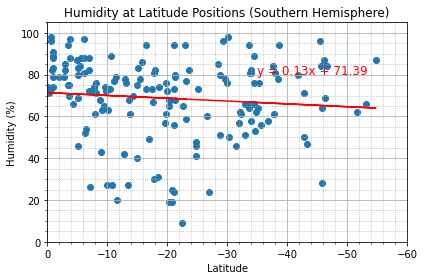

In [53]:
fig = plt.figure()
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/sh_lat_humid_regression1.png")
fig.savefig('sh_lat_humid_regression2.png', dpi=100)

## Humidity vs Latitude Linear Regression

#### There is insufficient strong correlation between humidity and latitude. However, there is a slight positive correlation in the Northern Hemisphere while a slight negative correlation in the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

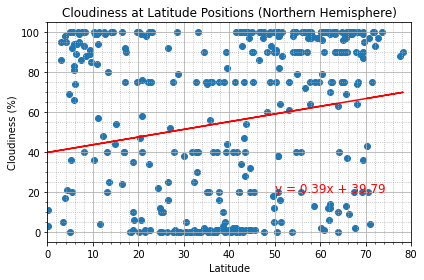

In [54]:
fig = plt.figure()
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/nh_lat_clouds_regression1.png")
fig.savefig('nh_lat_clouds_regression2.png', dpi=100)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

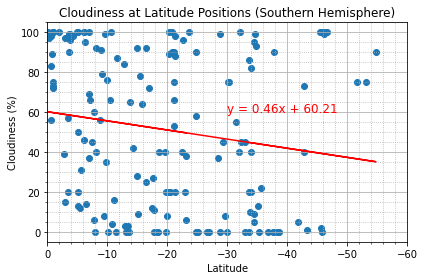

In [55]:
fig = plt.figure()
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/sh_lat_clouds_regression1.png")
fig.savefig('sh_lat_clouds_regression2.png', dpi=100)

## Cloudiness vs Latitude Linear Regression

#### There seems to be an insignificent correlation between cloudiness and latitude in terms of the plots but with  a linear regression analysis, there is a slight positive correlation in the Northern Hemisphere and a strong negative correlation in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

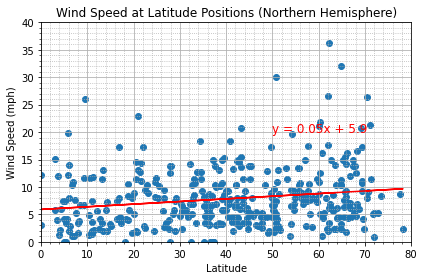

In [56]:
fig = plt.figure()
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/nh_lat_wind_regression1.png")
fig.savefig('nh_lat_wind_regression2.png', dpi=100)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

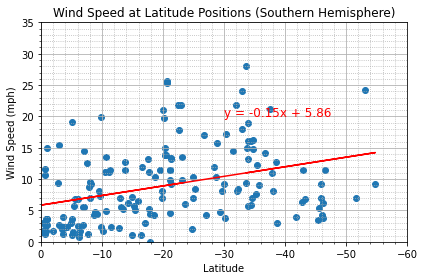

In [57]:
fig = plt.figure()
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("../Images/sh_lat_wind_regression1.png")
fig.savefig('sh_lat_wind_regression2.png', dpi=100)

## Wind Speed vs Latitude Linear Regression

#### The plots show significant correlation between wind speed and latitude but the linear regression shows a weaker correlation. There seems to be a correlation both hemispheres but the slope of the regression line is less steep as compard to the plots.